<a href="https://colab.research.google.com/github/MaddoSaru/curso-series-temporales/blob/master/Tarea_2_Retornos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing the relevant packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **LLR Test**

In [23]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# **Importing the Data and Pre-processing**

In [6]:
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/MaddoSaru/curso-series-temporales/master/4.%20Modelos%20AR%20autorregresivos/Python/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [7]:
df_comp['market_value']=df_comp.ftse #ftse

In [8]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# **DF TEST**

In [10]:
sts.adfuller(df_comp.market_value)  # H0: No Estacionario

(-1.597778892117985,
 0.4847091205465968,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '10%': -2.567015430304048,
  '5%': -2.862001080749219},
 68476.87620974617)

# **USING RETURNS**

In [11]:
df['returns']=df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]  #Correr los retornos en 1 para que no existan valores faltantes en el dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
sts.adfuller(df.returns)

(-12.770265719497182,
 7.798058336040345e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.7672456975)

# **ACF and PACF for Returns**

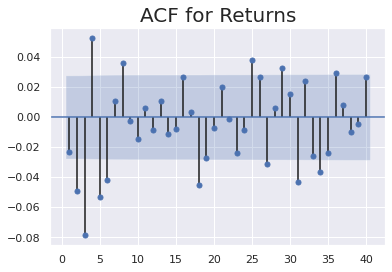

In [15]:
sgt.plot_acf(df.returns, zero = False, lags = 40)
plt.title("ACF for Returns", size = 20)
plt.show()

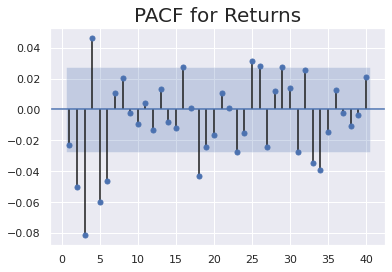

In [16]:
sgt.plot_pacf(df.returns, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Returns", size = 20)
plt.show()

# **AR(1)**

In [24]:
modelo_ar_1 = ARMA(df.returns, order=(1,0))
resultados_ar_1 = modelo_ar_1.fit()
resultados_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 08 Aug 2020   AIC                          15865.497
Time:                        18:51:54   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4386           +0.0000j           43.4386            0.5000
-----------------------------------------------------------------------------
"""

In [25]:
df['residuos_modelo'] = resultados_ar_1.resid
sts.adfuller(df.residuos_modelo)

(-12.782789959972796,
 7.354232414325527e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '10%': -2.5670785949998973,
  '5%': -2.8621197374408225},
 15696.449407720838)

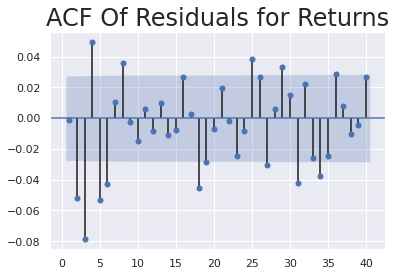

In [20]:
sgt.plot_acf(df.residuos_modelo, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

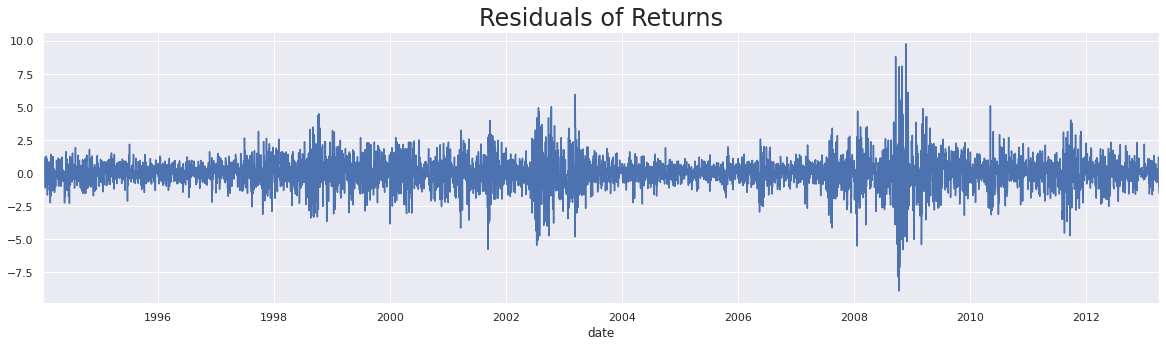

In [21]:
df.residuos_modelo[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=24)
plt.show()

# **Lags iterations**

In [26]:
modelo_ar_2 = ARMA(df.residuos, order=[2,0])
resultados_ar_2 = modelo_ar_2.fit()
print(resultados_ar_2.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_1, resultados_ar_2)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7922.979
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 08 Aug 2020   AIC                          15853.958
Time:                        18:52:46   BIC                          15880.043
Sample:                    01-10-1994   HQIC                         15863.099
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.633e-05      0.016      0.002      0.998      -0.031       0.031
ar.L1.residuos    -0.0012      0.014     -0.087      0.930      -0.029       0.026
ar.L2.residuos    -0.0519      0.014

In [27]:
modelo_ar_3 = ARMA(df.residuos, order=[3,0])
resultados_ar_3 = modelo_ar_3.fit()
print(resultados_ar_3.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_2, resultados_ar_3)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7907.175
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 08 Aug 2020   AIC                          15824.350
Time:                        18:53:39   BIC                          15856.956
Sample:                    01-10-1994   HQIC                         15835.775
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001      0.015      0.008      0.993      -0.028       0.029
ar.L1.residuos    -0.0054      0.014     -0.381      0.703      -0.033       0.022
ar.L2.residuos    -0.0520      0.014

In [28]:
modelo_ar_4 = ARMA(df.residuos, order=[4,0])
resultados_ar_4 = modelo_ar_4.fit()
print(resultados_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_3, resultados_ar_4)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.661
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 08 Aug 2020   AIC                          15815.323
Time:                        18:54:32   BIC                          15854.450
Sample:                    01-10-1994   HQIC                         15829.033
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.667e-05      0.015      0.005      0.996      -0.030       0.030
ar.L1.residuos    -0.0017      0.014     -0.118      0.906      -0.029       0.026
ar.L2.residuos    -0.0496      0.014

In [29]:
modelo_ar_5 = ARMA(df.residuos, order=[5,0])
resultados_ar_5 = modelo_ar_5.fit()
print(resultados_ar_5.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_4, resultados_ar_5)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.065
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 08 Aug 2020   AIC                          15798.130
Time:                        18:55:08   BIC                          15843.779
Sample:                    01-10-1994   HQIC                         15814.126
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001      0.014      0.009      0.993      -0.028       0.028
ar.L1.residuos     0.0012      0.014      0.088      0.930      -0.026       0.029
ar.L2.residuos    -0.0545      0.014

In [30]:
modelo_ar_6 = ARMA(df.residuos, order=[6,0])
resultados_ar_6 = modelo_ar_6.fit()
print(resultados_ar_6.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_5, resultados_ar_6)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7887.004
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 08 Aug 2020   AIC                          15790.008
Time:                        18:55:40   BIC                          15842.178
Sample:                    01-10-1994   HQIC                         15808.289
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.014      0.011      0.991      -0.027       0.027
ar.L1.residuos    -0.0015      0.014     -0.109      0.913      -0.029       0.026
ar.L2.residuos    -0.0524      0.014

In [31]:
modelo_ar_7 = ARMA(df.residuos, order=[7,0])
resultados_ar_7 = modelo_ar_7.fit()
print(resultados_ar_7.summary()) 
print ("LLR test: " + str(LLR_test(resultados_ar_6, resultados_ar_7)))

                              ARMA Model Results                              
Dep. Variable:               residuos   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.619
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 08 Aug 2020   AIC                          15791.237
Time:                        18:56:13   BIC                          15849.928
Sample:                    01-10-1994   HQIC                         15811.803
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001      0.014      0.011      0.992      -0.027       0.027
ar.L1.residuos    -0.0010      0.014     -0.070      0.944      -0.029       0.027
ar.L2.residuos    -0.0516      0.014

In [32]:
print("LLR test: " + str(LLR_test(resultados_ar_1, resultados_ar_6, DF = 5)))

LLR test: 0.0
